In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from pylab import rcParams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import pickle
from sklearn.neural_network import MLPClassifier

In [2]:
train=pickle.load(open('train_fs.pickle','rb'))
test=pickle.load(open('test_fs.pickle','rb'))
train_labels=pickle.load(open('train_labels_fs.pickle','rb'))
test_labels=pickle.load(open('test_labels_fs.pickle','rb'))

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our model with 500 trees
rf = RandomForestClassifier(n_estimators=500, oob_score=True,class_weight='balanced')

# Fit our model to training data
rf = rf.fit(train, train_labels)

In [12]:
predicted_test = rf.predict(test)

In [13]:
actual_test=np.array(test_labels)

In [14]:
accuracy=1-sum(abs(predicted_test-actual_test))/actual_test.size

In [15]:
accuracy*100

88.469999999999999

In [16]:
result=confusion_matrix(predicted_test,test_labels)

In [3]:
result

array([[ 278,   62],
       [1091, 8569]])

In [4]:
result= result/ result.astype(np.float).sum(axis=0)

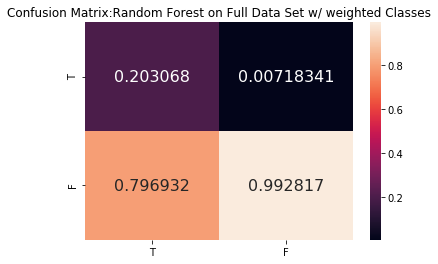

In [5]:
import seaborn as sn
df_cm=pd.DataFrame(result,['T', 'F'],['T','F'])
sn.heatmap(df_cm,annot=True,annot_kws={"size":16},fmt='g')
#plt.xlabel('Deviation From Actual')
#ylabel='Actual'
plt.title('Confusion Matrix:Random Forest on Full Data Set w/ weighted Classes')
plt.show()